Импортируем необходимые библиотеки

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [77]:
data = pd.read_csv('sales.csv')
data.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [79]:
data.duplicated().sum()

1

In [80]:
data = data.drop_duplicates()

In [81]:
data.duplicated().sum()

0

In [82]:
data.isna().sum()

SalePrice        0
GrLivArea        0
GarageArea       0
OverallQual      0
Street           0
SaleCondition    0
dtype: int64

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1459.0,180941.703907,79465.875738,34900.0,129950.0,163000.0,214000.0,755000.0
GrLivArea,1459.0,1515.679918,525.595586,334.0,1129.0,1464.0,1777.5,5642.0
GarageArea,1459.0,472.975326,213.878071,0.0,333.0,480.0,576.0,1418.0
OverallQual,1459.0,6.098698,1.383270,1.0,5.0,6.0,7.0,10.0


In [84]:
data.describe(include='object')

,Street,SaleCondition
count,1459,1459
unique,2,6
top,Pave,Normal
freq,1453,1197


In [85]:
data['Street'].value_counts()

Street
Pave    1453
Grvl       6
Name: count, dtype: int64

In [86]:
data['Street'] = data['Street'].replace({'Grvl': 0, 'Pave': 1}).astype(int)

/tmp/ipykernel_13596/254078863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Street'] = data['Street'].replace({'Grvl': 0, 'Pave': 1}).astype(int)


In [87]:
data['SaleCondition'].value_counts()

SaleCondition
Normal     1197
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [88]:
le = LabelEncoder()
le.fit(data['SaleCondition'])
data['SaleCondition'] = le.transform(data['SaleCondition']).astype(int)

In [89]:
data['SaleCondition'].value_counts()

SaleCondition
4    1197
5     125
0     101
3      20
2      12
1       4
Name: count, dtype: int64

In [90]:
data.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,1,4
1,181500,1262,460,6,1,4
2,223500,1786,608,7,1,4
3,140000,1717,642,7,1,0
4,250000,2198,836,8,1,4


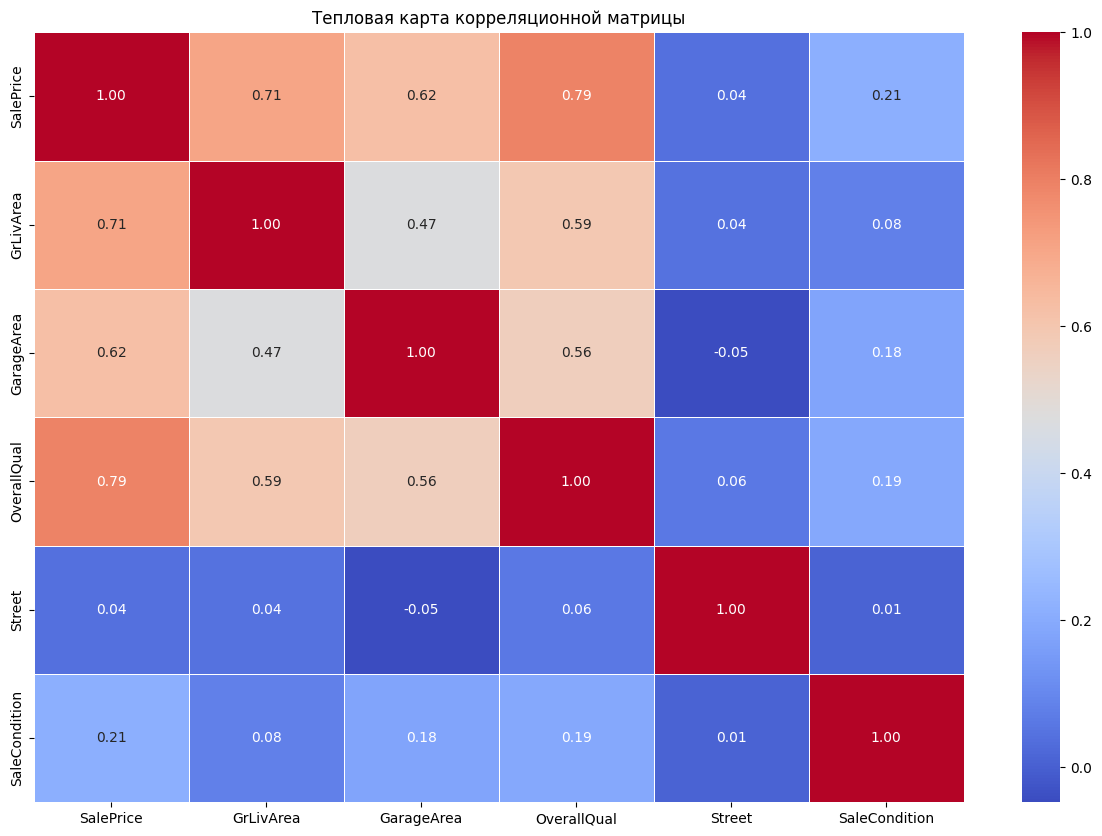

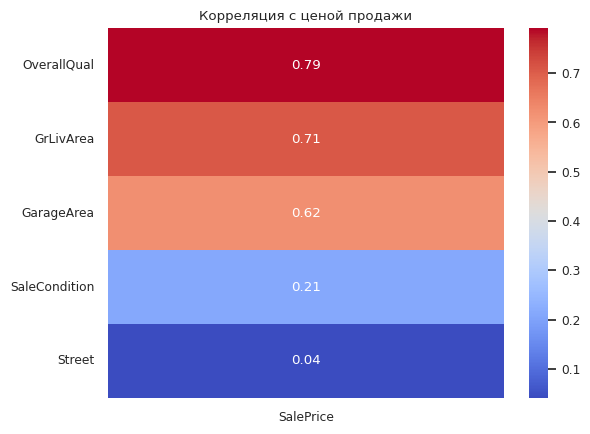

In [104]:
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = data.corr()
target_corr = corr['SalePrice'].drop('SalePrice')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с ценой продажи')
plt.show()

Положительные значения корреляции (красный цвет) показывают, что между параметром и ценой продажи существует прямая связь: выше значение параметра, выше зарплата. Отрицательные значения корреляции (синий цвет) говорят о том, что между параметром и ценой продажи обратная связь: выше значение параметра, ниже зарплата.

Наиболее значимые положительные корреляции:

OverallQual (0.79) - предположительно, общее качество сильно влияет на стоимость жилья.

GrLivArea (0.71) - наземная жилая зона имеет достаточно положительную корреляцию с стоимостью жилья.

GarageArea (0.62) - достаточно умеренная положительная связь с стоимостью жилья.

Отрицательных корреляций не наблюдается. Видимо, все признаки имеют линейную связь с целевой переменной(SalePrice).

Выбор признаков

In [91]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

Разделение данных на обучающую и тестовую выборки

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Создание модели линейной регрессии

In [93]:
model = LinearRegression()

Обучение модели

In [94]:
model.fit(X_train, y_train)

LinearRegression()

Предсказание на тестовой выборке

In [95]:
y_pred = model.predict(X_test)

Вычисление MAE и MSE на обучающей выборке

In [96]:
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

Вычисление MAE и MSE на тестовой выборке

In [97]:
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

Вывод результатов

In [98]:
print(f"MAE на обучающей выборке: {mae_train:.2f}")
print(f"MSE на обучающей выборке: {mse_train:.2f}")
print(f"MAE на тестовой выборке: {mae_test:.2f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")

MAE на обучающей выборке: 27086.50
MSE на обучающей выборке: 1749277093.88
MAE на тестовой выборке: 25528.99
MSE на тестовой выборке: 1115801200.08


На основе представленных данных можно сделать следующие выводы:

 Модель демонстрирует приемлемую точность на тестовой выборке. MAE (средняя абсолютная ошибка) на тестовой выборке (25528.99) меньше, чем MAE на обучающей выборке (27086.50), что указывает на то, что модель не переобучилась. 
 Модель показывает значительное улучшение на тестовой выборке по сравнению с обучающей. MSE (среднеквадратическая ошибка) на тестовой выборке (1115801200.08) значительно ниже, чем MSE на обучающей выборке (1749277093.88). Это говорит о том, что модель хорошо обобщается на новые данные.

Однако, для более глубокой оценки модели, необходимо:

 Узнать масштаб предсказываемых значений.  Если MAE составляет 25528.99, но предсказываемые значения измеряются в миллионах, то такая ошибка может быть приемлемой. 
 Сравнить результаты с другими моделями.  Важно понять, насколько хорошо данная модель работает по сравнению с другими алгоритмами машинного обучения. 
 Проанализировать распределение ошибок.  Посмотрите, насколько ошибки модели отличаются для различных типов данных.
 Изучить визуализации.  Графики ошибок и остатков могут дать больше информации о поведении модели.

В целом, представленные данные указывают на то, что модель обладает хорошей точностью и хорошо обобщается на новые данные. Однако, для более уверенной оценки необходимо провести более глубокий анализ.